In [60]:
# Import Libraries

# Basic Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
# Visualization Libraries
import plotly.express as px
from tabulate import tabulate
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
import descartes

# Classification and Regression Algorithm Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score


from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()


In [3]:
df = pd.read_csv('C:/Users/HP/Documents/DATASETS/housing india/House Price India.csv')

# Identify Schema and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [9]:
# Data Analysis
df.head()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [10]:
# looking at the shape for the rows and columns
df.shape

(14620, 23)

In [11]:
# Checking for duplicates
df.duplicated().sum()

0

In [12]:
# Field by Field Distinct Values
print("Number of Bedrooms avaialble:")
df["number of bedrooms"].unique()
print("Number of Bathrooms avaialble:")
df["number of bathrooms"].unique()
print("Number of FLoors avaialble:")
df["number of floors"].unique()
print("Types of Views avaialble:")
df["number of views"].unique()
print("Condition of Houses avaialble:")
df["condition of the house"].unique()
print("Distance from the airport:")
df["Distance from the airport"].unique()
print("Houses are built in the year range:")
df["Built Year"].unique()
print("Houses are renovated in the year range:")
df["Renovation Year"].unique()

Number of Bedrooms avaialble:
Number of Bathrooms avaialble:
Number of FLoors avaialble:
Types of Views avaialble:
Condition of Houses avaialble:
Distance from the airport:
Houses are built in the year range:
Houses are renovated in the year range:


array([   0, 1994, 1954, 2011, 1998, 1992, 1958, 2014, 2002, 2004, 2013,
       1986, 2005, 1990, 2001, 1984, 1956, 2000, 2010, 2003, 1996, 1977,
       2007, 1983, 1970, 1981, 1975, 1971, 1988, 1999, 2009, 1995, 1969,
       1997, 2015, 1982, 1989, 2006, 1985, 1993, 1953, 1955, 1979, 1987,
       1960, 1934, 1945, 2008, 2012, 1980, 1972, 1948, 1978, 1991, 1968,
       1974, 1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959,
       1957, 1962], dtype=int64)

In [13]:
# Number of houses avaialble avaiable by TYpe

df["number of bedrooms"].value_counts()
df["number of bathrooms"].value_counts()
df["number of floors"].value_counts()
df["number of views"].value_counts()
df["condition of the house"].value_counts()
df["Distance from the airport"].value_counts()
df["Built Year"].value_counts()
df["Renovation Year"].value_counts() 

0       13954
2014       76
2013       30
2003       27
2005       23
        ...  
1948        1
1967        1
1944        1
1959        1
1962        1
Name: Renovation Year, Length: 68, dtype: int64

In [15]:
# Field by Field Min and Max Distinct Values

print("Min Bedroom avaiable:", min(df["number of bedrooms"]))
print("Max Bedroom avaiable:", max(df["number of bedrooms"]))
print("Min Price for house:", min(df['Price']))
print("Max price avaiable:", max(df['Price']))
print("Min Number of floors available:", min(df["number of floors"]))
print("Max Number of floors available::", max(df["number of floors"]))
print("Oldest house built:", min(df["Built Year"]))
print("Newest  house built:", max(df["Built Year"]))

Min Bedroom avaiable: 1
Max Bedroom avaiable: 33
Min Price for house: 78000
Max price avaiable: 7700000
Min Number of floors available: 1.0
Max Number of floors available:: 3.5
Oldest house built: 1900
Newest  house built: 2015


In [342]:
# getting the statistical summary so far
df.describe().round(2)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,...,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00,14620.00
mean,6.762821e+09,42604.54,3.38,2.13,2098.26,15093.28,1.50,0.01,0.23,3.43,...,1970.93,90.92,122033.06,52.79,-114.40,1996.70,12753.50,2.01,64.95,538932.22
std,6.237570e+03,67.35,0.94,0.77,928.28,37919.62,0.54,0.09,0.77,0.66,...,29.49,416.22,19.08,0.14,0.14,691.09,26058.41,0.82,8.94,367532.38
min,6.762810e+09,42491.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,1900.00,0.00,122003.00,52.39,-114.71,460.00,651.00,1.00,50.00,78000.00
25%,6.762815e+09,42546.00,3.00,1.75,1440.00,5010.75,1.00,0.00,0.00,3.00,...,1951.00,0.00,122017.00,52.71,-114.52,1490.00,5097.75,1.00,57.00,320000.00
50%,6.762821e+09,42600.00,3.00,2.25,1930.00,7620.00,1.50,0.00,0.00,3.00,...,1975.00,0.00,122032.00,52.81,-114.42,1850.00,7620.00,2.00,65.00,450000.00
75%,6.762826e+09,42662.00,4.00,2.50,2570.00,10800.00,2.00,0.00,0.00,4.00,...,1997.00,0.00,122048.00,52.91,-114.32,2380.00,10125.00,3.00,73.00,645000.00
max,6.762832e+09,42734.00,33.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,...,2015.00,2015.00,122072.00,53.01,-113.50,6110.00,560617.00,3.00,80.00,7700000.00


In [19]:
# Remove Houses which have bedrooms greater than 10 for plotting purpose
mask = df['number of bedrooms'] <= 10
df1 = df[mask]
df1.drop(columns=['id', 'Date'], inplace=True)
df1.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [20]:
df1.shape

(14618, 21)

In [22]:
# Generate New Column Rating based on House Grading
df1['Rating'] = df1['Rating'] = ['Good' if x < 7 else 'Excellent' for x in df1['grade of the house']] 

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14618 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14618 non-null  int64  
 1   number of bathrooms                    14618 non-null  float64
 2   living area                            14618 non-null  int64  
 3   lot area                               14618 non-null  int64  
 4   number of floors                       14618 non-null  float64
 5   waterfront present                     14618 non-null  int64  
 6   number of views                        14618 non-null  int64  
 7   condition of the house                 14618 non-null  int64  
 8   grade of the house                     14618 non-null  int64  
 9   Area of the house(excluding basement)  14618 non-null  int64  
 10  Area of the basement                   14618 non-null  int64  
 11  Bu

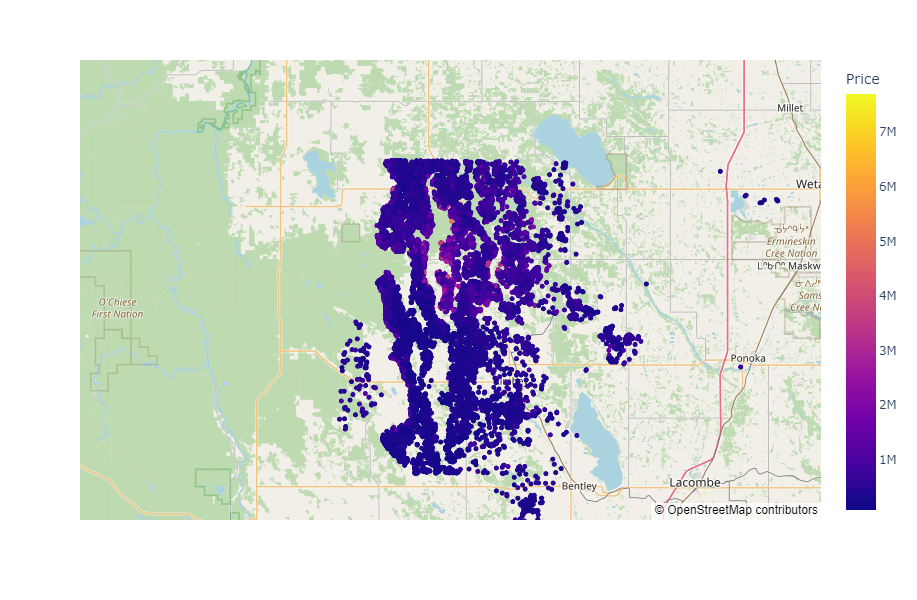

In [74]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="Lattitude",
    lon="Longitude",
    width=600,  # Width of map
    height=600,  # Height of map
    color="Price",
    hover_data=["Price"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

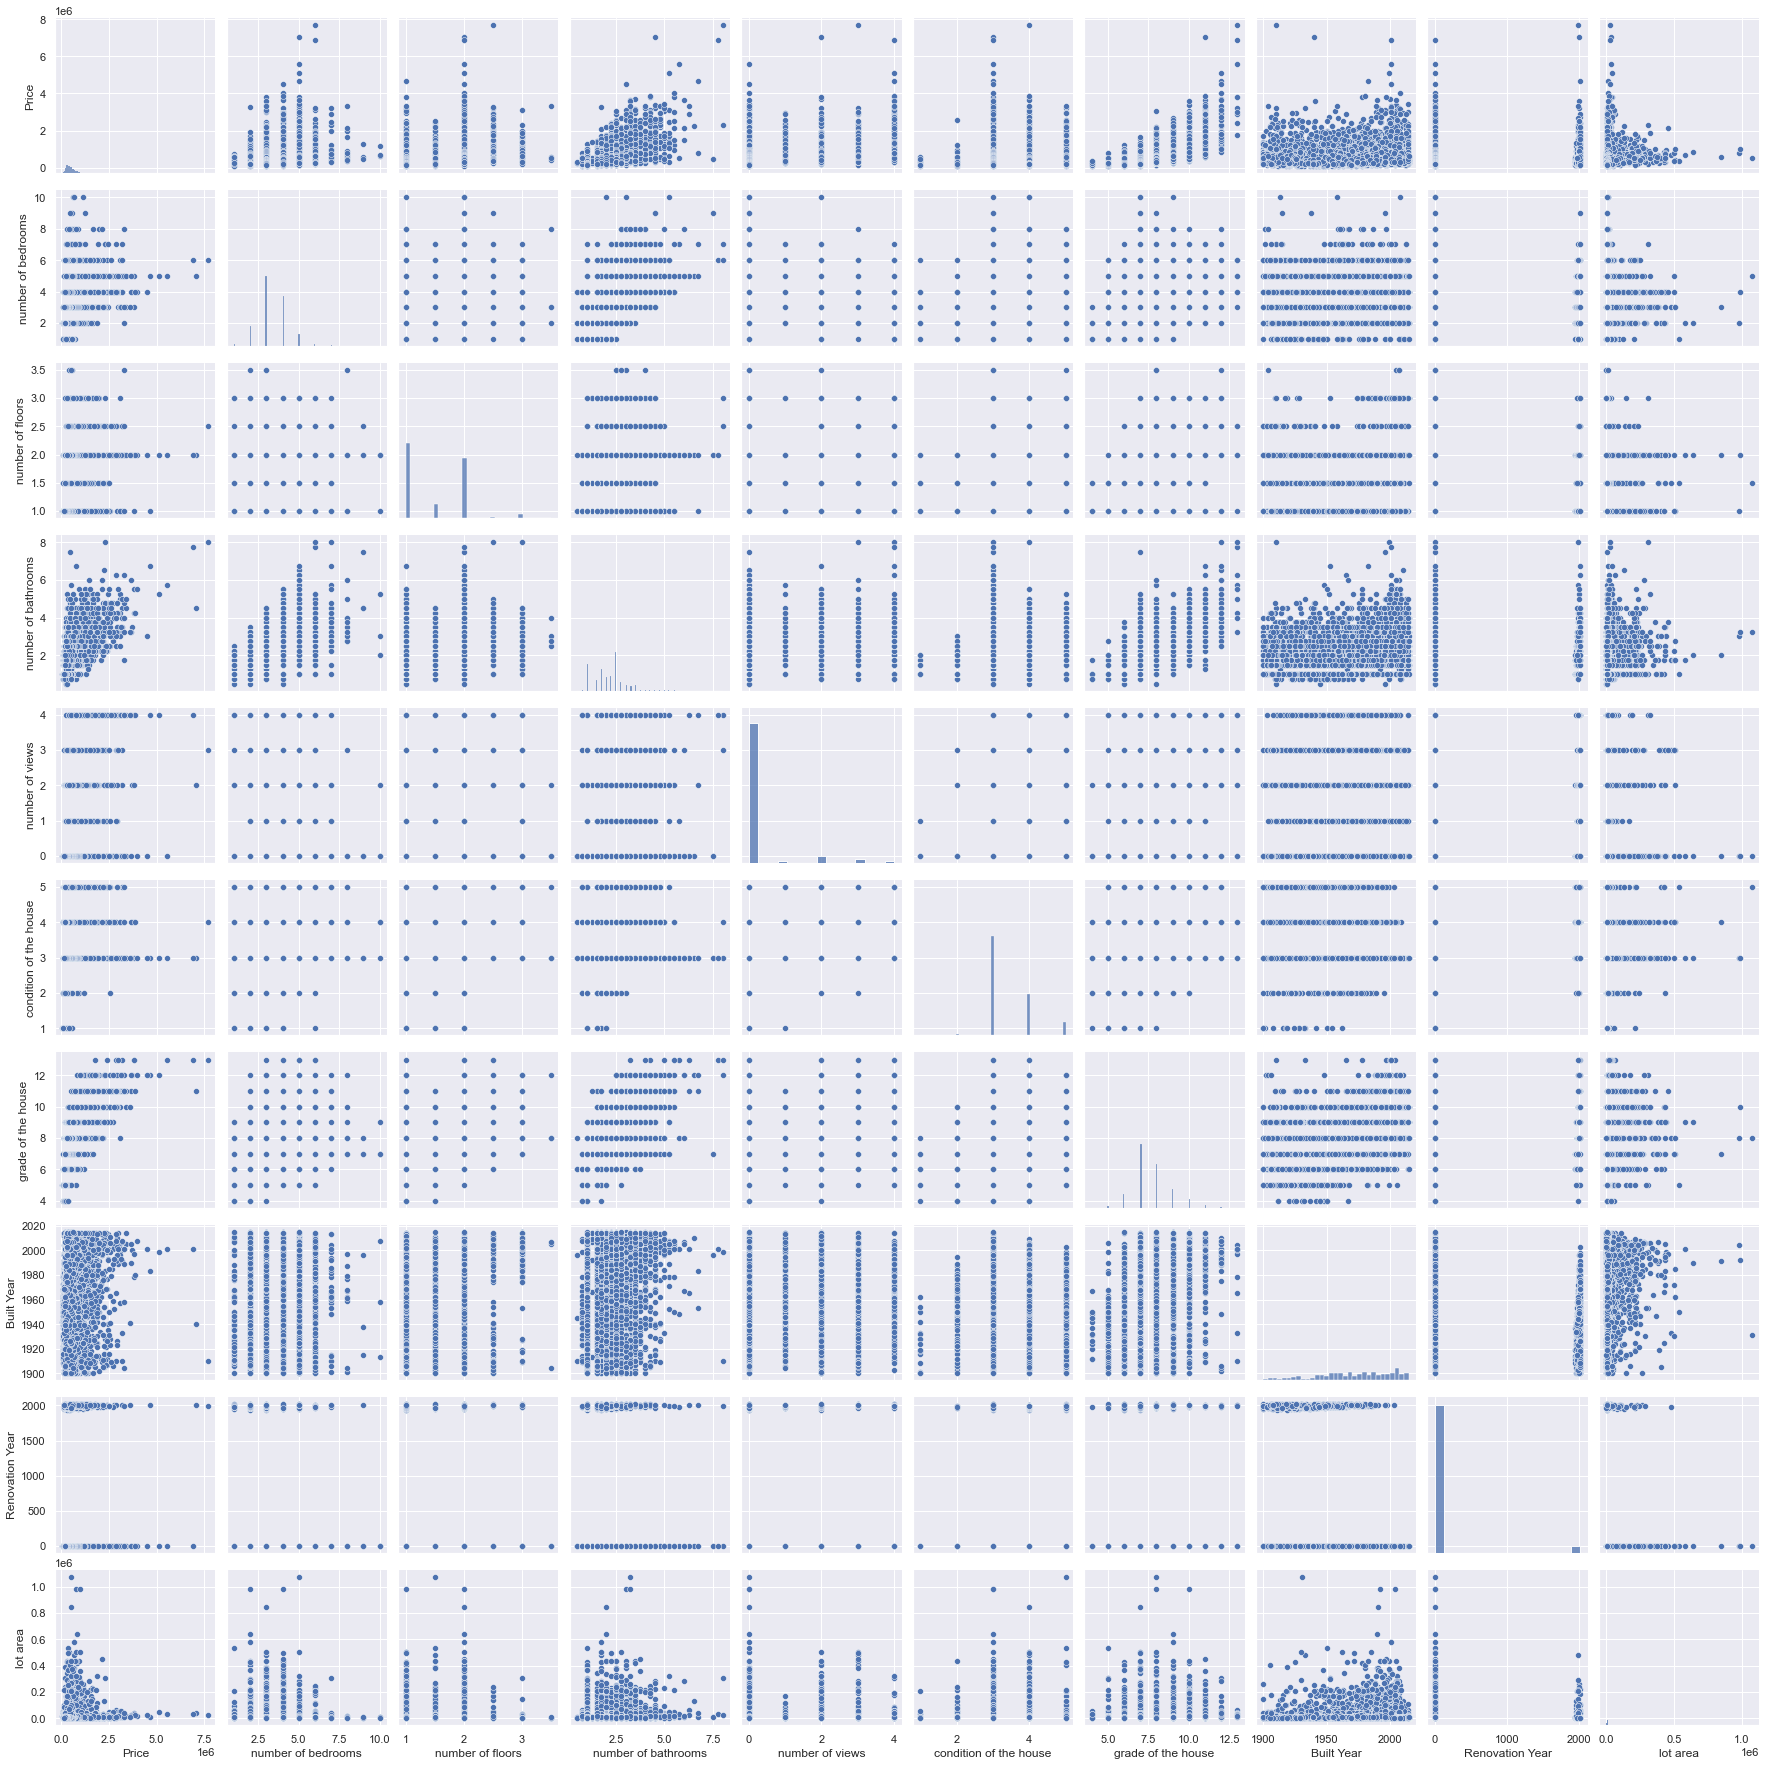

In [346]:
#Data Visualization

# Seabron Visualization using pairplot
sns.pairplot(df1[['Price','number of bedrooms','number of floors','number of bathrooms','number of views','condition of the house','grade of the house','Built Year','Renovation Year','lot area']])



<AxesSubplot:>

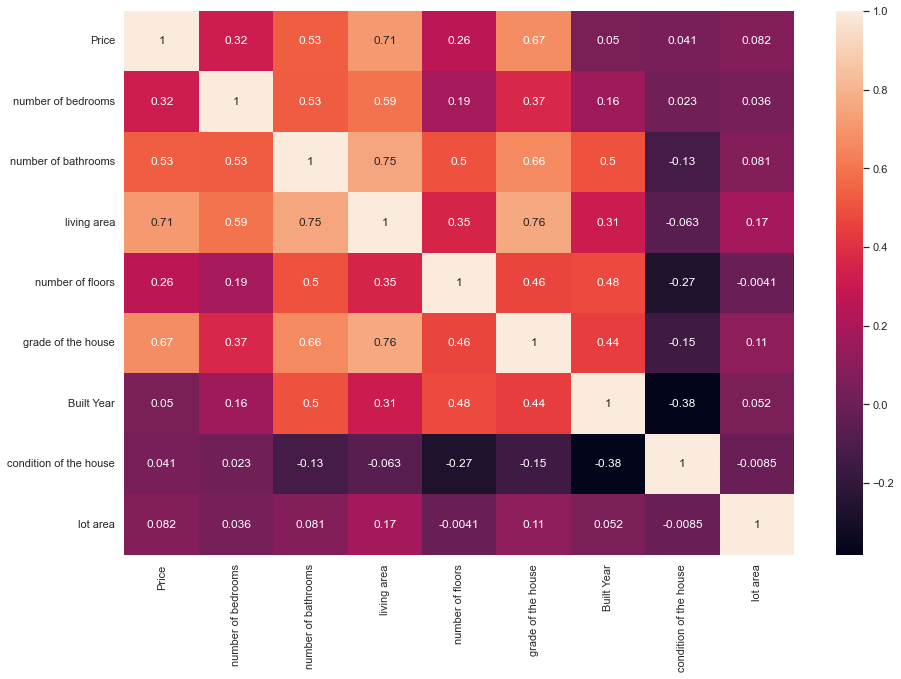

In [347]:
# Heat map showing co-relationship between variables

plt.figure(figsize=(15,10))
columns =['Price','number of bedrooms','number of bathrooms','living area','number of floors','grade of the house','Built Year','condition of the house','lot area']
sns.heatmap(df1[columns].corr(),annot=True)

In [348]:
# Linear regression between Price and Sqft

Text(0.5, 1.0, 'Number of Bedrooms')

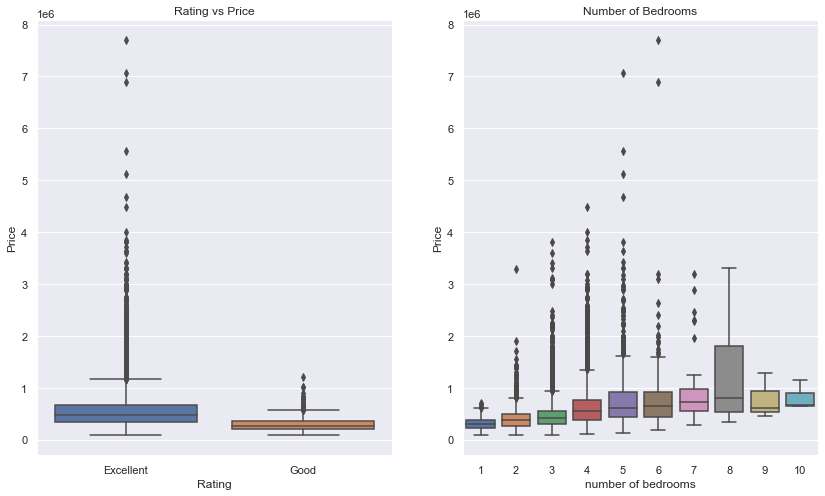

In [349]:
# Rating(Good vs Excellent) and their price, # of Bedrooms and their price
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.boxplot(x = 'Rating',y='Price', data = df1, ax=ax[0])
ax[0].set_title('Rating vs Price')
sns.boxplot(x = 'number of bedrooms',y='Price', data = df1, ax=ax[1])
ax[1].set_title('Number of Bedrooms')

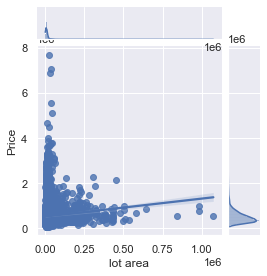

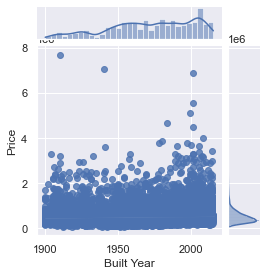

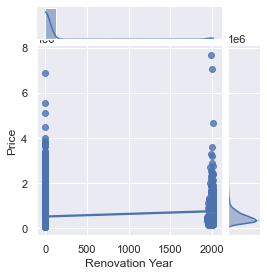

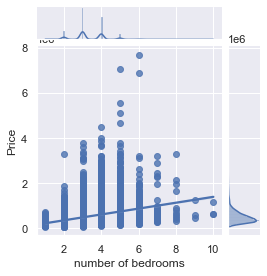

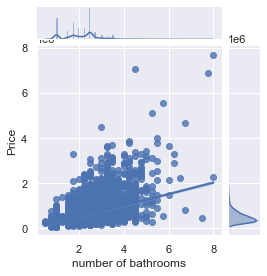

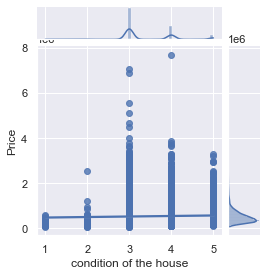

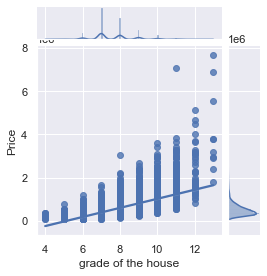

In [350]:
# Indivudal variable relationship with Price

# Linear regression between sqft and price
sns.jointplot(x='lot area',y='Price',data=df1,kind='reg',size=4)

# Linear regression between Year Built and price
sns.jointplot(x='Built Year',y='Price',data=df1,kind='reg',size=4)

# Linear regression between Year renovated and price
sns.jointplot(x='Renovation Year',y='Price',data=df1,kind='reg',size=4)

# Linear regression between Number of Bedrooms and price
sns.jointplot(x='number of bedrooms',y='Price',data=df1,kind='reg',size=4)

# Linear regression between Number of Bathrooms and price
sns.jointplot(x='number of bathrooms',y='Price',data=df1,kind='reg',size=4)

# Linear regression between condition and price
sns.jointplot(x='condition of the house',y='Price',data=df1,kind='reg',size=4)

# Linear regression between grade and price
sns.jointplot(x='grade of the house',y='Price',data=df1,kind='reg',size=4)

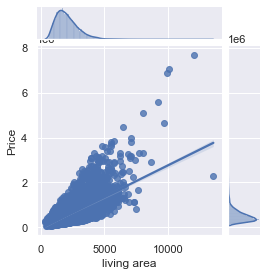

In [351]:
# Linear regression between grade and price
sns.jointplot(x='living area',y='Price',data=df1,kind='reg',size=4)

In [352]:
# Building our model using different regression models

In [354]:
# Data Preparation for fitting data into model
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14618 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14618 non-null  int64  
 1   number of bathrooms                    14618 non-null  float64
 2   living area                            14618 non-null  int64  
 3   lot area                               14618 non-null  int64  
 4   number of floors                       14618 non-null  float64
 5   waterfront present                     14618 non-null  int64  
 6   number of views                        14618 non-null  int64  
 7   condition of the house                 14618 non-null  int64  
 8   grade of the house                     14618 non-null  int64  
 9   Area of the house(excluding basement)  14618 non-null  int64  
 10  Area of the basement                   14618 non-null  int64  
 11  Bu

In [355]:
df1.head(10)



,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Rating
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,Excellent
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,Excellent
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,Excellent
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,Excellent
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,Excellent
5,3,2.50,2600,4750,1.0,0,0,4,9,1700,...,0,122007,52.9133,-114.590,2380,4750,1,67,790000,Excellent
6,5,3.25,3660,11995,2.0,0,2,3,10,3660,...,0,122008,52.7637,-114.050,3320,11241,3,72,785000,Excellent
7,3,1.75,2240,10578,2.0,0,0,5,8,1550,...,0,122006,52.9254,-114.482,1570,10578,3,71,750000,Excellent
8,3,2.50,2390,6550,1.0,0,2,4,8,1440,...,0,122009,52.8014,-114.598,2010,6550,1,73,750000,Excellent
9,4,2.25,2200,11250,1.5,0,0,5,7,1300,...,0,122010,52.9145,-114.391,2320,10814,2,53,698000,Excellent


In [23]:
df2 = df1.drop(['Rating'],axis=1)
df2['number of bedrooms'] = df2['number of bedrooms'].apply(np.int64)
df2['Price'] = df2['Price'].apply(np.int64)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14618 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14618 non-null  int64  
 1   number of bathrooms                    14618 non-null  float64
 2   living area                            14618 non-null  int64  
 3   lot area                               14618 non-null  int64  
 4   number of floors                       14618 non-null  float64
 5   waterfront present                     14618 non-null  int64  
 6   number of views                        14618 non-null  int64  
 7   condition of the house                 14618 non-null  int64  
 8   grade of the house                     14618 non-null  int64  
 9   Area of the house(excluding basement)  14618 non-null  int64  
 10  Area of the basement                   14618 non-null  int64  
 11  Bu

In [25]:
target = "Price"
X = df2.drop(columns=target)
y = df2[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (14618, 20)
y shape: (14618,)


In [26]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13156, 20)
y_train shape: (13156,)
X_test shape: (1462, 20)
y_test shape: (1462,)


In [27]:
# Multiple Linear Regression Model

mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [28]:
# Decision Tree Regressional Model

tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)


In [29]:
# Random Forest Regressional Model

rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [30]:
# Calculate Model Score for all Regressional Models

print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  70
Decision tree  Regression Model Score is  77
Random Forest Regression Model Score is  89


,Model,Score,Explained Variance Score
2,Random forest Regression,0.892148,0.869697
1,Decision Tree,0.770460,0.778857
0,Multiple Linear Regression,0.699510,0.598134


In [31]:
# Apply Naïve Bayes Classifier to classify Rating of houses with the decision boundaries

In [32]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X["Price"], loc = mu_list[p]["Price"]["Price"], scale = std_list[p]["Price"]["Price"] )  
                * norm.pdf(x = X["living area"], loc = mu_list[p][0]["living area"], scale = std_list[p]["Price"]["living area"] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [33]:
def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [34]:
#Estimating the parameters
mu_list = np.split(df1.groupby('Rating').mean().values,[1,2])
std_list = np.split(df1.groupby('Rating').std().values,[1,2], axis = 0)

pi_list = df1[["Price","living area"]].value_counts().values / len(df1)

mu_list

[array([[ 3.46231807e+00,  2.23150194e+00,  2.20425101e+03,
          1.52372463e+04,  1.54739770e+00,  7.54400671e-03,
          2.48952221e-01,  3.41606340e+00,  7.88851635e+00,
          1.88695801e+03,  3.17292997e+02,  1.97421062e+03,
          9.02395794e+01,  1.22032185e+05,  5.27964630e+01,
         -1.14399161e+02,  2.06563225e+03,  1.28581185e+04,
          2.00868704e+00,  6.49336280e+01,  5.67511114e+05]]),
 array([[ 2.62608696e+00,  1.23461538e+00,  1.16762475e+03,
          1.38424261e+04,  1.10702341e+00,  8.69565217e-03,
          9.43143813e-02,  3.55652174e+00,  5.87424749e+00,
          1.05424147e+03,  1.13383278e+02,  1.94214916e+03,
          9.57163880e+01,  1.22040764e+05,  5.27610330e+01,
         -1.14446368e+02,  1.39247157e+03,  1.18457672e+04,
          2.04414716e+00,  6.51217391e+01,  2.88013838e+05]]),
 array([], shape=(0, 21), dtype=float64)]

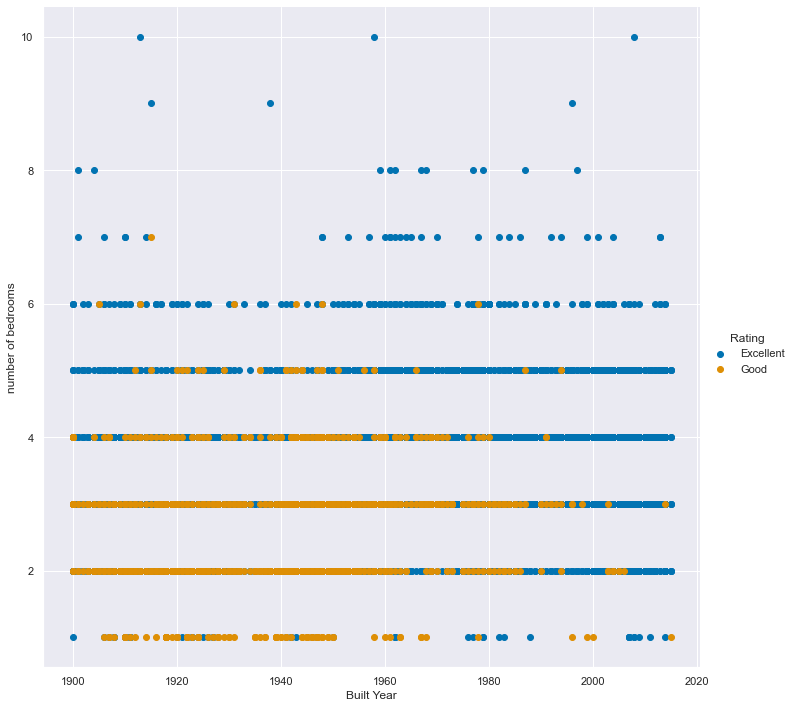

In [35]:
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['b','r']

my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df1, hue="Rating", size=10, palette = 'colorblind') .map(plt.scatter, "Built Year", "number of bedrooms",)  .add_legend()
my_ax = g.ax

In [36]:
# Apply logistic regression to classify Rating  with the decision boundaries

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14618 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14618 non-null  int64  
 1   number of bathrooms                    14618 non-null  float64
 2   living area                            14618 non-null  int64  
 3   lot area                               14618 non-null  int64  
 4   number of floors                       14618 non-null  float64
 5   waterfront present                     14618 non-null  int64  
 6   number of views                        14618 non-null  int64  
 7   condition of the house                 14618 non-null  int64  
 8   grade of the house                     14618 non-null  int64  
 9   Area of the house(excluding basement)  14618 non-null  int64  
 10  Area of the basement                   14618 non-null  int64  
 11  Bu

In [38]:
#split dataset in features and target variable
feature_cols = ['number of bedrooms','Built Year','number of floors']
X = df1[feature_cols] # Features
y = df1["condition of the house"] # Target variable

In [39]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [40]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [41]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0,    0,    6,    0,    0],
       [   0,    0,   27,    0,    0],
       [   0,    0, 2344,   10,    0],
       [   0,    0,  926,    9,    0],
       [   0,    0,  330,    3,    0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

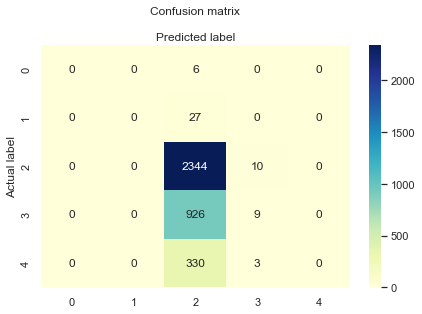

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
acc_train = logreg.score(X_train, y_train)
acc_test = logreg.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.6375
Test Accuracy: 0.6438


In [44]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
import matplotlib.cm as cm
regr = skl_lm.LogisticRegression()
regr.fit(X_train, y_train)

LogisticRegression()

In [45]:
pred = regr.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

True       1   2     3    4    5
Predicted                       
1          0   0     0    0    0
2          0   0     0    0    0
3          6  27  2344  926  330
4          0   0    10    9    3
5          0   0     0    0    0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        27
           3       0.65      1.00      0.78      2354
           4       0.41      0.01      0.02       935
           5       0.00      0.00      0.00       333

    accuracy                           0.64      3655
   macro avg       0.21      0.20      0.16      3655
weighted avg       0.52      0.64      0.51      3655



In [46]:
# Data Preparation for Random Forest Plot

df1.info()
df1.head(10)

df3 = df1[['number of bedrooms','Built Year','Rating']]

df3['Rating'] = ['1' if x == 'Excellent' else '0' for x in df3['Rating']] 

df3.info()

df3.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14618 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14618 non-null  int64  
 1   number of bathrooms                    14618 non-null  float64
 2   living area                            14618 non-null  int64  
 3   lot area                               14618 non-null  int64  
 4   number of floors                       14618 non-null  float64
 5   waterfront present                     14618 non-null  int64  
 6   number of views                        14618 non-null  int64  
 7   condition of the house                 14618 non-null  int64  
 8   grade of the house                     14618 non-null  int64  
 9   Area of the house(excluding basement)  14618 non-null  int64  
 10  Area of the basement                   14618 non-null  int64  
 11  Bu

,number of bedrooms,Built Year,Rating
0,5,1921,1
1,4,1909,1
2,5,1939,1
3,4,2001,1
4,3,1929,1
5,3,1951,1
6,5,2006,1
7,3,1923,1
8,3,1955,1
9,4,1920,1


In [47]:
# Select Year bedrooms, Year built 
X1 = df3.iloc[:, [0, 1]].values
X1

array([[   5, 1921],
       [   4, 1909],
       [   5, 1939],
       ...,
       [   2, 1962],
       [   4, 1955],
       [   3, 1969]], dtype=int64)

In [48]:
# select Rating
y1 = df3.iloc[:, 2].values
y1

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42)


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [50]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  90,  285],
       [  83, 3197]], dtype=int64)